# Titanic Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary
- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
 - pclass: A proxy for socio-economic status (SES)
1st = Upper  &
2nd = Middle  &
3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister  & 
Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
Parent = mother, father &
Child = daughter, son, stepdaughter, stepson -
Some children travelled only with a nanny, therefore parch=0 for them.

### First step importing the important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- i used train csv file

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task 1 : Perform Data Cleaning
### Clean a dataset delete missing data & outliers.

#### Check null values 

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop null values

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### check Age outliers

In [9]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1 
outlier_checker = df[(df['Age'] < Q1 - IQR*1.5) | (df['Age']> Q3 + IQR*1.5)]

In [10]:
outlier_checker

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### no outliers

## Task 2 Calculate summary statistics
### Calculate summary statistics (mean, median, mode, standard deviation) for a dataset

In [11]:
median = df.Age.median()
mode = df.Age.mode()

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [21]:
print('the age mean value is:',round(df.Age.mean()))

the age mean value is: 36


In [22]:
print('the age median value is:',median)

the age median value is: 36.0


In [23]:
print('the most frequency value for age is:',mode[0])

the most frequency value for age is: 36.0


 - Mean = Median = Mode 
* so the age distribution is a normal distribution

## Task 3 : Visualization

Text(0, 0.5, '# of people')

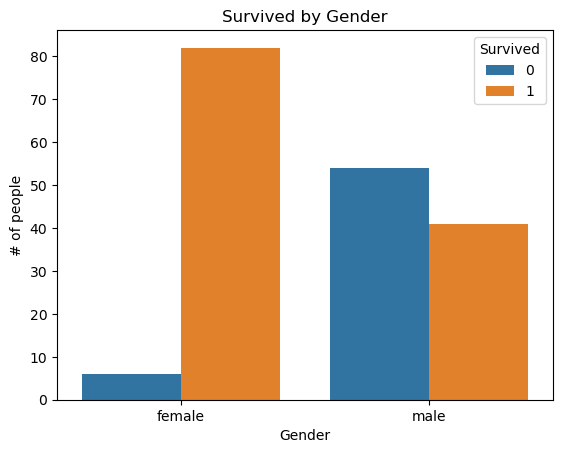

In [25]:
sns.countplot(df, x="Sex", hue= 'Survived')
plt.title('Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

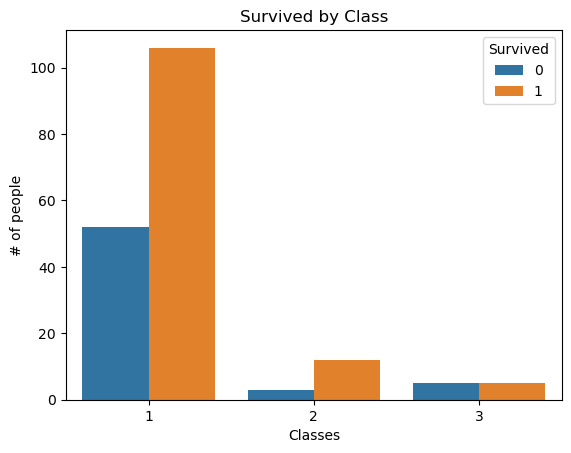

In [26]:
sns.countplot(df, x="Pclass", hue= 'Survived')
plt.title('Survived by Class')
plt.xlabel('Classes')
plt.ylabel('# of people')

Text(0, 0.5, '# of people')

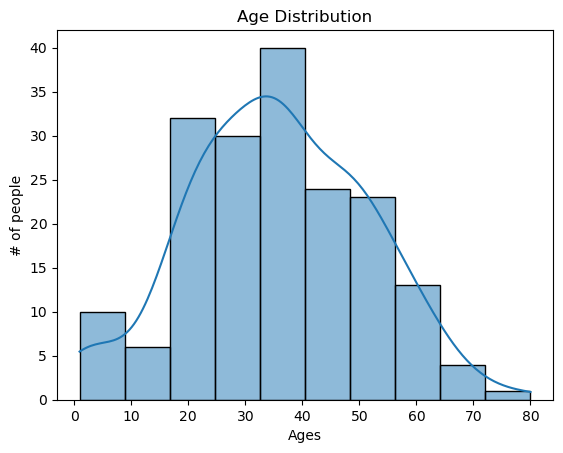

In [28]:
sns.histplot(df, x= 'Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('# of people')

## Task 4 Pivote Table

In [29]:
pd.pivot_table(df, index = ["Sex","Age"], aggfunc=np.sum)

C:\Users\HASSAN\AppData\Local\Temp\ipykernel_16364\1025218069.py:1: FutureWarning: The operation <function sum at 0x0000024D70ADE2A0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pd.pivot_table(df, index = ["Sex","Age"], aggfunc=np.sum)


Fare  Parch  PassengerId  Pclass  SibSp  Survived
Sex    Age                                                        
female 2.0   162.0125      3          504       4      1         0
       4.0    55.7000      2          630       5      3         2
       14.0  120.0000      2          436       1      1         1
       15.0  211.3375      1          690       1      0         1
       16.0  183.8792      2         1689       3      0         3
...               ...    ...          ...     ...    ...       ...
male   64.0  263.0000      4          439       1      1         0
       65.0   88.5292      1          512       2      0         0
       70.0   71.0000      1          746       1      1         0
       71.0   34.6542      0           97       1      0         0
       80.0   30.0000      0          631       1      0         1

[95 rows x 6 columns]

## Task 5 Check duplicates

In [30]:
df.duplicated().any().sum()

0

### no duplicated values